<a href="https://colab.research.google.com/github/Tolegithub7/ml_labs/blob/main/Visualizing_Output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('pokemon.csv', encoding='unicode_escape')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary']
df = df[types].drop(columns=drop_cols)
df.head()


,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,318,45,49,49,65,65,45
1,2,Ivysaur,405,60,62,63,80,80,60
2,3,Venusaur,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,4,Charmander,309,39,52,43,60,50,65


In [4]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=3)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2]})
df['cen_y'] = df.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})


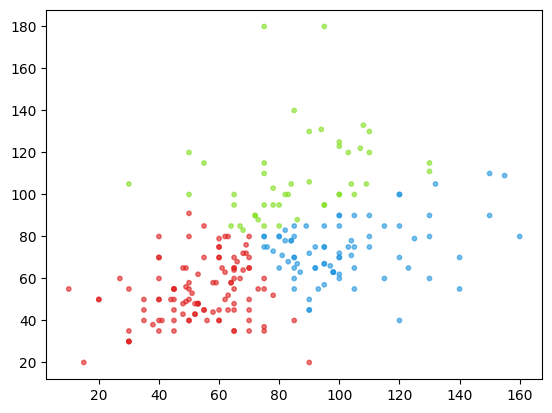

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.Attack, df.Defense, c=df.c, alpha=0.6, s=10)


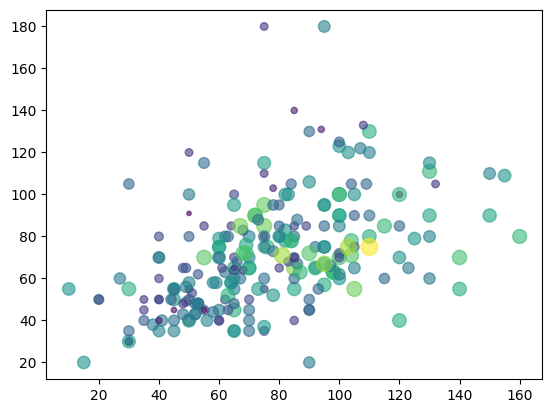

In [6]:
plt.scatter(df.Attack, df.Defense, c=df.Speed, s=df.Speed, alpha=0.6)

Text(0, 0.5, 'Defense')

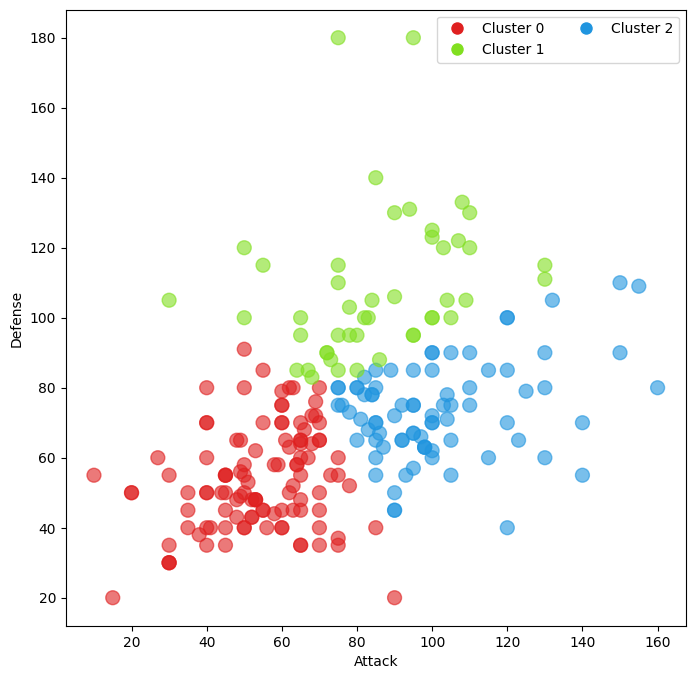

In [7]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(df.Attack, df.Defense, c=df.c, s=100, alpha=0.6)

# Centroids
centroids = [Line2D([0], [0], marker='o', color='w', label='Centroid {}'.format(i),
                     markerfacecolor=color) for i, color in enumerate(colors)]

# Legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i),
                           markerfacecolor=color, markersize=10) for i, color in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper right', ncol=2)
plt.xlabel('Attack')
plt.ylabel('Defense')